In [1]:
import mlgrad.pca as pca
import mlgrad.inventory as inventory
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# def dist2(S, X, c):
#     return np.array([((S @ x) @ x) for x in (X-c)])

In [3]:
X, Y = load_iris(return_X_y=True)

In [4]:
c, As, Ls = pca.find_loc_and_pc(X, 2)

In [5]:
print(Ls)
print(As)

[4.200 0.241]
[[ 0.361 -0.085  0.857  0.358]
 [ 0.657  0.730 -0.173 -0.075]]


In [6]:
U = pca.transform(X, c, As)

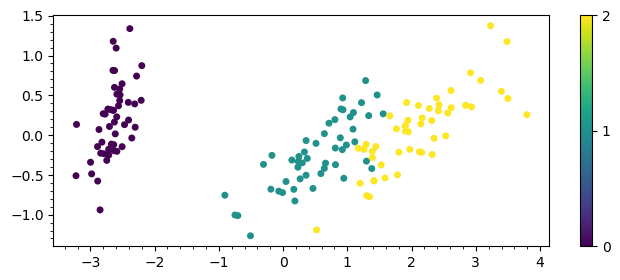

In [7]:
plt.figure(figsize=(8, 3))
cs = plt.scatter(U[:,0], U[:,1], c=Y, s=16)
plt.colorbar(cs, ticks=[0,1,2])
plt.minorticks_on()
plt.show()

In [8]:
U0 = U[Y==0]
U1 = U[Y==1]
U2 = U[Y==2]

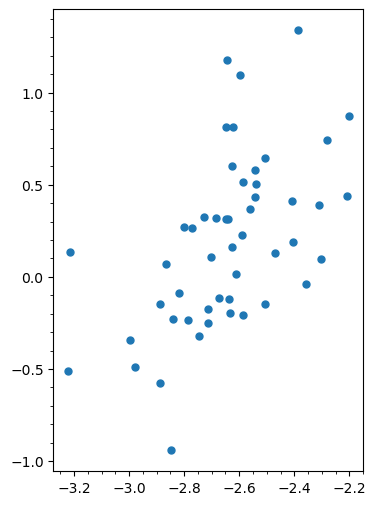

In [9]:
plt.figure(figsize=(4, 6))
plt.scatter(U0[:,0], U0[:,1], s=25, label="0")
plt.minorticks_on()
plt.show()

In [10]:
c0 = pca.location(U0)
C0 = pca.scatter_matrix(U0-c0)
S0 = np.linalg.inv(C0)
print(c0)
print(S0)

[-2.642  0.191]
[[29.495 -7.593]
 [-7.593  6.642]]


In [11]:
def eval_dd(S, c, xrange, yrange):
    xx, yy = np.meshgrid(xrange, yrange)
    xy = np.c_[xx.ravel(), yy.ravel()]
    dd = inventory.mahalanobis_distance(S, xy, c)
    dd = np.sqrt(dd.reshape(xx.shape))
    return xx, yy, dd

xb0 = inventory.array_bounds(U0[:,0])
yb0 = inventory.array_bounds(U0[:,1])
xrange0 = np.linspace(xb0[0], xb0[1], 101)
yrange0 = np.linspace(yb0[0], yb0[1], 101)
xx0, yy0, dd0 = eval_dd(S0, c0, xrange0, yrange0)

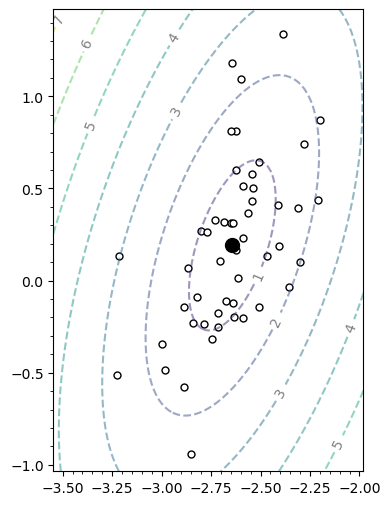

In [12]:
plt.figure(figsize=(4, 6))
plt.scatter(U0[:,0], U0[:,1], s=25, c='w', edgecolors='k', label="0")
plt.scatter([c0[0]], [c0[1]], s=100, c='k')
cc0 = plt.contour(xx0, yy0, dd0, alpha=0.5, linestyles='--')
plt.clabel(cc0, colors='k', fontsize=10)
plt.minorticks_on()
plt.show()

In [13]:
c1 = pca.location(U1)
C1 = pca.scatter_matrix(U1-c1)
S1 = np.linalg.inv(C1)

In [14]:
xb1 = inventory.array_bounds(U1[:,0])
yb1 = inventory.array_bounds(U1[:,1])
xrange1 = np.linspace(xb1[0], xb1[1], 101)
yrange1 = np.linspace(yb1[0], yb1[1], 101)
xx1, yy1, dd1 = eval_dd(S1, c1, xrange1, yrange1)

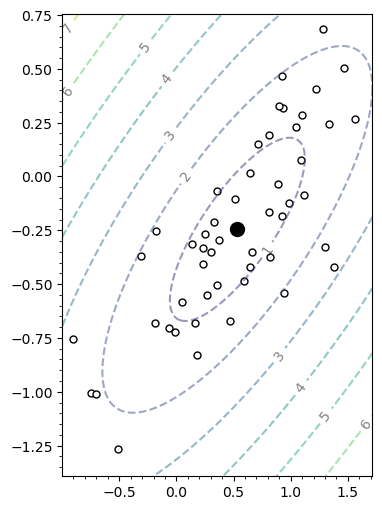

In [15]:
plt.figure(figsize=(4, 6))
plt.scatter(U1[:,0], U1[:,1], s=25, c='w', edgecolors='k', label="1")
plt.scatter([c1[0]], [c1[1]], s=100, c='k')
cc1 = plt.contour(xx1, yy1, dd1, alpha=0.5, linestyles='--')
plt.clabel(cc1, colors='k', fontsize=10)
plt.minorticks_on()
plt.show()

In [16]:
c2 = pca.location(U2)
C2 = pca.scatter_matrix(U2-c2)
S2 = np.linalg.inv(C2)

In [17]:
xb2 = inventory.array_bounds(U2[:,0])
yb2 = inventory.array_bounds(U2[:,1])
xrange2 = np.linspace(xb2[0], xb2[1], 101)
yrange2 = np.linspace(yb2[0], yb2[1], 101)
xx2, yy2, dd2 = eval_dd(S2, c2, xrange2, yrange2)

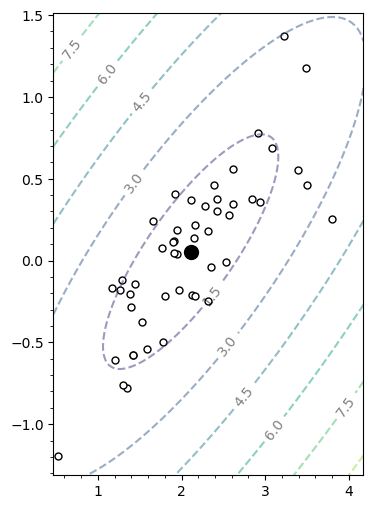

In [18]:
plt.figure(figsize=(4, 6))
plt.scatter(U2[:,0], U2[:,1], s=25, c='w', edgecolors='k', label="2")
plt.scatter([c2[0]], [c2[1]], s=100, c='k')
cc2 = plt.contour(xx2, yy2, dd2, alpha=0.5, linestyles='--')
plt.clabel(cc2, colors='k', fontsize=10)
plt.minorticks_on()
plt.show()

In [19]:
xb = inventory.array_bounds(U[:,0])
yb = inventory.array_bounds(U[:,1])
xrange = np.linspace(xb[0], xb[1], 201)
yrange = np.linspace(yb[0], yb[1], 201)
xx, yy = np.meshgrid(xrange, yrange)
xy = np.c_[xx.ravel(), yy.ravel()]
dd0 = inventory.mahalanobis_distance(S0, xy, c0)
dd1 = inventory.mahalanobis_distance(S1, xy, c1)
dd2 = inventory.mahalanobis_distance(S2, xy, c2)
dd = np.array([min(d0,d1,d2) for d0,d1,d2 in zip(dd0,dd1,dd2)])
dd = np.sqrt(dd.reshape(xx.shape))

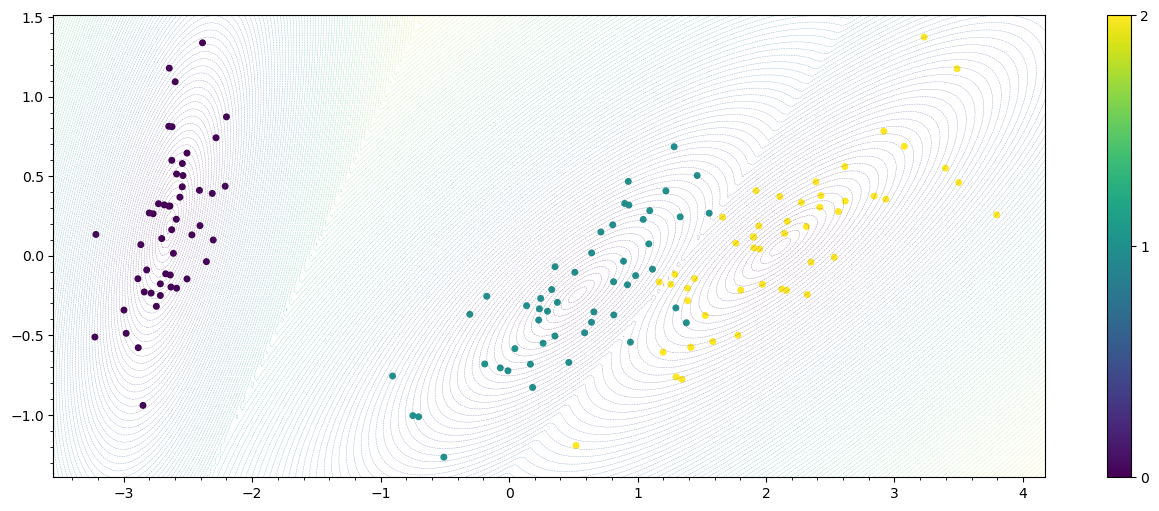

In [20]:
plt.figure(figsize=(16, 6))
cs = plt.scatter(U[:,0], U[:,1], c=Y, s=16)
plt.colorbar(cs, ticks=[0,1,2])
levels = np.linspace(dd.min(), dd.max(), 100)
cc = plt.contour(xx, yy, dd, levels=levels, alpha=0.5, linestyles='--', linewidths=0.33)
# plt.clabel(cc, colors='k', fontsize=10)
plt.minorticks_on()
plt.show()

In [21]:
idd = np.array([np.argmin([d0,d1,d2]) for d0,d1,d2 in zip(dd0,dd1,dd2)])
idd = idd.reshape(xx.shape)

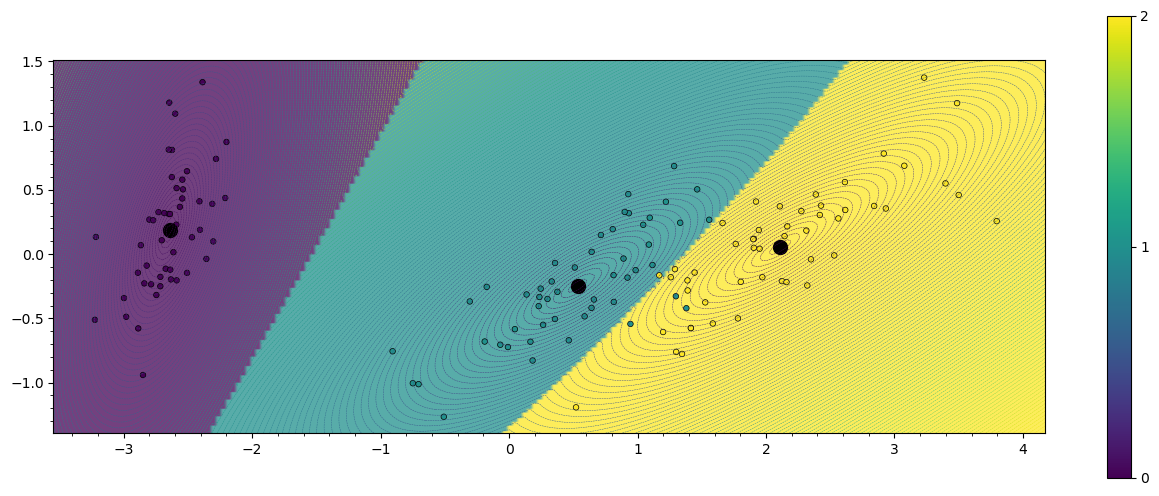

In [22]:
plt.figure(figsize=(16, 6))
cs = plt.scatter(U[:,0], U[:,1], c=Y, s=16, edgecolors="k", linewidths=0.5)
plt.scatter([c0[0],c1[0],c2[0]], [c0[1],c1[1], c2[1]], s=100, c='k')
plt.colorbar(cs, ticks=[0,1,2])
plt.imshow(idd, origin="lower",extent=(*xb,*yb), alpha=0.75)
plt.contour(xx, yy, dd, levels=levels, linestyles='--', linewidths=0.33)
plt.minorticks_on()
plt.show()